### Agnostic smooth minimization

**Purpose of this demo**: Motivate optimization in general (hyper-parameter selection, non-convexity)

+ Disclaimer: I'm not expert in Python - I use Python/Matlab as tools to validate algorithms and theorems. 
+ Thus, my implementations are not the most efficient ones + there might be bugs

**Problem definition:**. 

\begin{align}
  f(x_1, x_2) = (x_1 + 2x_2 - 7)^2 + (2x_1 + x_2 - 5)^2
\end{align}

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^2}{\text{min}}
& & f(x_1, x_2)
\end{aligned}
\end{equation*}

+ Any properties you might extract by just looking at the function?

+ Is it differentiable?

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_1} = 2(x_1 + 2x_2 - 7) + 4(2x_1 + x_2 - 5)
\end{align}

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_2} = 4(x_1 + 2x_2 - 7) + 2(2x_1 + x_2 - 5)
\end{align}

and as a vector:
\begin{align}
    \nabla f(x_1, x_2) = \begin{bmatrix} 2(x_1 + 2x_2 - 7) + 4(2x_1 + x_2 - 5) \\ 4(x_1 + 2x_2 - 7) + 2(2x_1 + x_2 - 5) \end{bmatrix}
\end{align}

+ Is it negative-valued, positive-valued, or both?

**3D plot** 

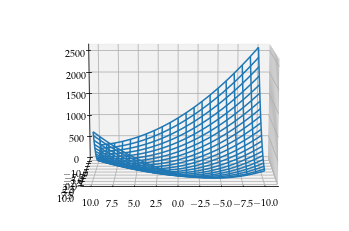

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from numpy import linalg as la

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + 2*Y - 7)**2 + (2*X + Y - 5)**2

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.view_init(10, 90)

In [2]:
# Returns the value of the objecive function
def f(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [3]:
def GD_Booth(x_new, eta, iters, epsilon, verbose, x_star):
    p = 2
    
    x_list, f_list = [la.norm(x_new - x_star, 2)], [f(x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        grad[0] = 2*(x_old[0] + 2*x_old[1] - 7) + 4*(2*x_old[0] + x_old[1] - 5)
        grad[1] = 4*(x_old[0] + 2*x_old[1] - 7) + 2*(2*x_old[0] + x_old[1] - 5)
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_star, 2)) + ", f(x_new) = " + str(f(x_new)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

[ 0.41233628 -0.34294361]
iter# = 0, ||x_new - x_star||_2 = 2.715363183021951, f(x_new) = 46.924362722629674
iter# = 1, ||x_new - x_star||_2 = 2.172290546417561, f(x_new) = 30.031592142483
iter# = 2, ||x_new - x_star||_2 = 1.7378324371340486, f(x_new) = 19.22021897118912
iter# = 3, ||x_new - x_star||_2 = 1.390265949707239, f(x_new) = 12.300940141561039
iter# = 4, ||x_new - x_star||_2 = 1.1122127597657916, f(x_new) = 7.872601690599076
iter# = 5, ||x_new - x_star||_2 = 0.8897702078126337, f(x_new) = 5.038465081983414
iter# = 6, ||x_new - x_star||_2 = 0.711816166250107, f(x_new) = 3.224617652469384
iter# = 7, ||x_new - x_star||_2 = 0.5694529330000857, f(x_new) = 2.063755297580408
iter# = 8, ||x_new - x_star||_2 = 0.45556234640006876, f(x_new) = 1.3208033904514629
iter# = 9, ||x_new - x_star||_2 = 0.36444987712005505, f(x_new) = 0.8453141698889364
iter# = 10, ||x_new - x_star||_2 = 0.29155990169604407, f(x_new) = 0.5410010687289186
iter# = 11, ||x_new - x_star||_2 = 0.23324792135683492, f(

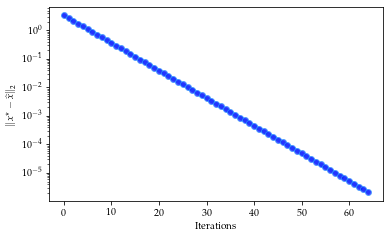

In [4]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 100
eta = 0.1
x_init = np.random.randn(2)    # Initial estimate
# print(x_init)
#x_init[0] = 1
#x_init[1] = 1
print(x_init)
x_star = [1, 3]
        
x_GD, x_list, f_list = GD_Booth(x_init, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

**Problem definition: Weirder 2d non-convex problem**. 

\begin{align}
  f(x_1, x_2) = \sum_{i = 1}^2 \tfrac{x_i^2}{4000} - \prod_{i = 1}^2\cos\left( \tfrac{x_i}{\sqrt{i}} \right) + 1
\end{align}

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^2}{\text{min}}
& & f(x_1, x_2)
\end{aligned}
\end{equation*}

+ Any properties you might extract by just looking at the function?

+ Is it differentiable?

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_1} = \tfrac{x_1}{2000} + \sin\left(x_1\right) \cdot \cos\left(\tfrac{x_2}{\sqrt{2}}\right)
\end{align}

\begin{align}
  \frac{\partial f(x_1, x_2)}{\partial x_2} = \tfrac{x_2}{2000} + \cos\left(x_1\right) \cdot \frac{\sin\left(\tfrac{x_2}{\sqrt{2}}\right)}{\sqrt{2}}
\end{align}

and as a vector:
\begin{align}
    \nabla f(x_1, x_2) = \begin{bmatrix} \tfrac{x_1}{2000} + \sin\left(x_1\right) \cdot \cos\left(\tfrac{x_2}{\sqrt{2}}\right) \\ 
    \tfrac{x_2}{2000} + \cos\left(x_1\right) \cdot \frac{\sin\left(\tfrac{x_2}{\sqrt{2}}\right)}{\sqrt{2}} \end{bmatrix}
\end{align}

**3D plot** 

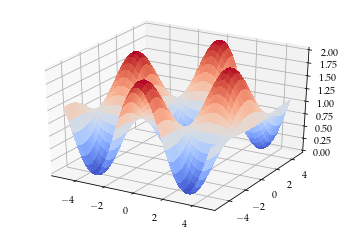

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2)/4000 + (Y**2)/4000 - np.cos(X)*np.cos(Y/np.sqrt(2)) + 1

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [6]:
# Returns the value of the objecive function
def f(x):
    return (x[0]**2)/4000 + (x[1]**2)/4000 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2)) + 1

In [7]:
def GD_Griewank(x_new, eta, iters, epsilon, verbose, x_star):
    p = 2
    
    x_list, f_list = [la.norm(x_new - x_star, 2)], [f(x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        grad[0] = x_old[0]/2000 + np.sin(x_old[0]) * np.cos(x_old[1]/np.sqrt(2))
        grad[1] = x_old[1]/2000 + np.cos(x_old[0]) * np.sin(x_old[1]/np.sqrt(2))/np.sqrt(2)
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_star, 2)) + ", f(x_new) = " + str(f(x_new)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

iter# = 0, ||x_new - x_star||_2 = 4.289994093446908, f(x_new) = 0.451111915378152
iter# = 1, ||x_new - x_star||_2 = 4.336622065544058, f(x_new) = 0.41742485538835383
iter# = 2, ||x_new - x_star||_2 = 4.382385899565041, f(x_new) = 0.38557080425973167
iter# = 3, ||x_new - x_star||_2 = 4.427164077022921, f(x_new) = 0.35556060647444554
iter# = 4, ||x_new - x_star||_2 = 4.470852561667597, f(x_new) = 0.3273866012169465
iter# = 5, ||x_new - x_star||_2 = 4.513364639108809, f(x_new) = 0.30102430813022985
iter# = 6, ||x_new - x_star||_2 = 4.554630365950368, f(x_new) = 0.27643442175438393
iter# = 7, ||x_new - x_star||_2 = 4.594595703117596, f(x_new) = 0.253564995562653
iter# = 8, ||x_new - x_star||_2 = 4.633221410216152, f(x_new) = 0.23235370132698585
iter# = 9, ||x_new - x_star||_2 = 4.6704817750393754, f(x_new) = 0.21273006291313157
iter# = 10, ||x_new - x_star||_2 = 4.706363245905188, f(x_new) = 0.1946175823068389
iter# = 11, ||x_new - x_star||_2 = 4.740863025600378, f(x_new) = 0.1779356966509

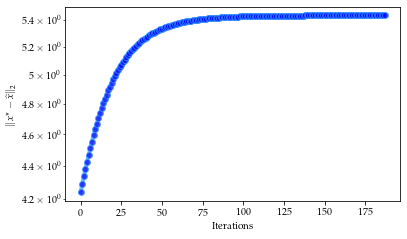

In [10]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000
eta = 0.1
# x_init = np.random.randn(2)    # Initial estimate
# print(x_init)
x_init[0] = -3
x_init[1] = 3
# print(x_init)
x_star = [0, 0]
        
x_GD, x_list, f_list = GD_Griewank(x_init, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Non-convex Lipschitz continuous gradient function

\begin{align}
  f(x) = x^2 + 3\sin^2(x)
\end{align}

Then, its gradient and Hessian are calculated as:
\begin{align}
f'(x) = 2x + 6\sin(x) \cdot \cos(x), ~~f''(x) = 2 + 6\cos^2(x) - 6\sin^2(x)
\end{align}


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Make data.
x = np.arange(-5, 5, 0.25)
f = x**2 + 3*(np.sin(x))**2

ax.plot(x, f, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Make data.
x = np.arange(-5, 5, 0.25)
hessian_f = 2 + 6*(np.cos(x))**2 - 6*(np.sin(x))**2

ax.plot(x, hessian_f, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=2)

Which means that we can upper bound:
\begin{align}
\|\nabla^2 f(x)\|_2 \leq 8 := L
\end{align}
